In [2]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

In [3]:
start_date = '2005-01-01'
end_date = '2023-02-01'

In [4]:
# Download data 
ticker = 'SPY'
df = yf.download(ticker, start_date, end_date)

[*********************100%***********************]  1 of 1 completed


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2005-01-03 00:00:00-05:00,121.559998,121.760002,119.900002,120.300003,84.894325,55748000
2005-01-04 00:00:00-05:00,120.459999,120.540001,118.440002,118.830002,83.856987,69167600
2005-01-05 00:00:00-05:00,118.739998,119.250000,118.000000,118.010002,83.278297,65667300
2005-01-06 00:00:00-05:00,118.440002,119.150002,118.260002,118.610001,83.701759,47814700
2005-01-07 00:00:00-05:00,118.970001,119.230003,118.129997,118.440002,83.581772,55847700


In [6]:
# convert index to date
df.index = df.index.date

In [7]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.894325,55748000
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.856987,69167600
2005-01-05,118.739998,119.250000,118.000000,118.010002,83.278297,65667300
2005-01-06,118.440002,119.150002,118.260002,118.610001,83.701759,47814700
2005-01-07,118.970001,119.230003,118.129997,118.440002,83.581772,55847700


# Compute daily returns

In [8]:
df['R'] = df['Adj Close'].pct_change()
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,R
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.894325,55748000,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.856987,69167600,-0.012219
2005-01-05,118.739998,119.250000,118.000000,118.010002,83.278297,65667300,-0.006901


#### How does it work with an example?

In [9]:
# one day return
83.856972 / 84.894348 - 1

-0.012219612075941688

In [10]:
# 2 day return
83.278297/84.894348 -1

-0.01903602581410957

In [11]:
# 2 day return from 1 day returns
# (1 + r1) * (1 + r2) = 2 day return
(1 + -0.012220) * (1 + -0.006901) -1 

-0.01903666978000007

# Plot the daily returns distribution

Text(0.5, 1.0, 'Daily Returns Distribution')

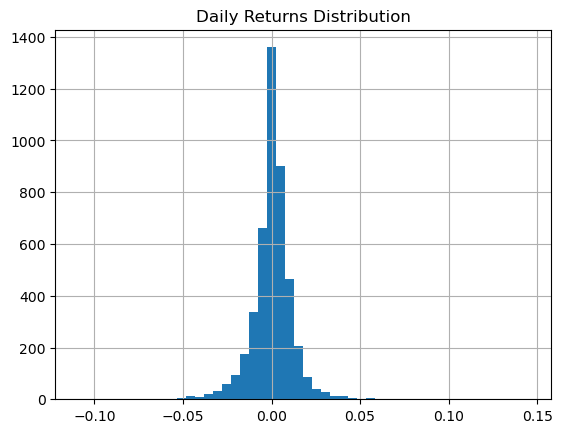

In [12]:
ax = df.R.hist(bins=50)
ax.set_title('Daily Returns Distribution')

In [13]:
# Daily returns decile table
breaks = np.arange(0, 1.1, 0.1)
df.R.quantile(breaks)
# .to_frame().T

0.0   -0.109424
0.1   -0.011832
0.2   -0.006127
0.3   -0.002814
0.4   -0.000830
0.5    0.000673
0.6    0.002420
0.7    0.004493
0.8    0.007431
0.9    0.012069
1.0    0.145198
Name: R, dtype: float64

# Alternative method to compute returns 

In [14]:
df['adjclose_lag'] = df['Adj Close'].shift(1)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,R,adjclose_lag
2005-01-03,121.559998,121.760002,119.900002,120.300003,84.894325,55748000,NaN,NaN
2005-01-04,120.459999,120.540001,118.440002,118.830002,83.856987,69167600,-0.012219,84.894325
2005-01-05,118.739998,119.250000,118.000000,118.010002,83.278297,65667300,-0.006901,83.856987


In [15]:
df['R'] = df['Adj Close'] / df['adjclose_lag'] - 1

In [16]:
df = df[~df.R.isnull()]
df = df['R'].to_frame()

In [17]:
df.head()

,R
2005-01-04,-0.012219
2005-01-05,-0.006901
2005-01-06,0.005085
2005-01-07,-0.001434
2005-01-10,0.004728


# Compute monthly returns

In [18]:
df.index = pd.to_datetime(df.index)

In [19]:
monthly_ret = df.R.resample('M').agg(lambda x: (1 + x).prod() - 1)

In [20]:
monthly_ret = monthly_ret.to_frame()

In [21]:
monthly_ret.head()

,R
2005-01-31,-0.017789
2005-02-28,0.020904
2005-03-31,-0.018293
2005-04-30,-0.018735
2005-05-31,0.032225


# Plot Returns data

- Histogram
- Q-Q Plot
- Boxplot
- Time Series

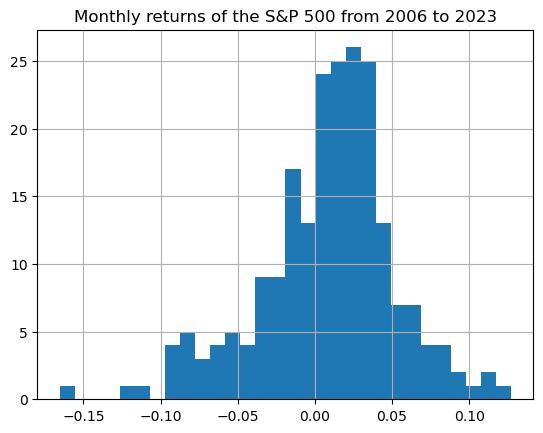

In [22]:
# Histogram
ax = monthly_ret.R.hist(bins=30)
ax.set_title("Monthly returns of the S&P 500 from 2006 to 2023");

In [23]:
monthly_ret.R.mean()

0.008215425566089785

In [24]:
monthly_ret.R.quantile([0, 0.25, 0.5, 0.75, 1])

0.00   -0.165187
0.25   -0.015706
0.50    0.013371
0.75    0.034737
1.00    0.126984
Name: R, dtype: float64

# Expected Return

In [25]:
# with the mean we get 10% per annum, which is reasonable!
(1 + monthly_ret.R.mean() ) ** 12 -1

0.10316393075734065

# Visualizing univariate distributions

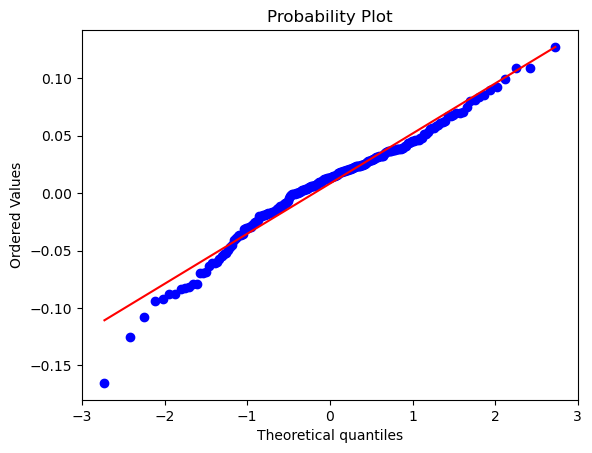

In [26]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(monthly_ret.R, dist="norm", plot=plt);

In [27]:
monthly_ret.R.quantile([0.25, 0.5, 0.75])

0.25   -0.015706
0.50    0.013371
0.75    0.034737
Name: R, dtype: float64

<AxesSubplot:>

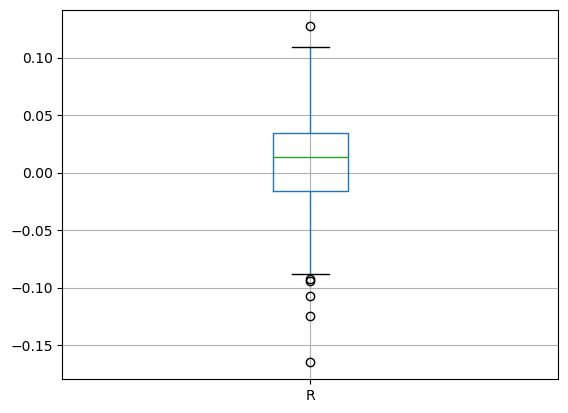

In [28]:
# Boxplot
monthly_ret.boxplot('R')

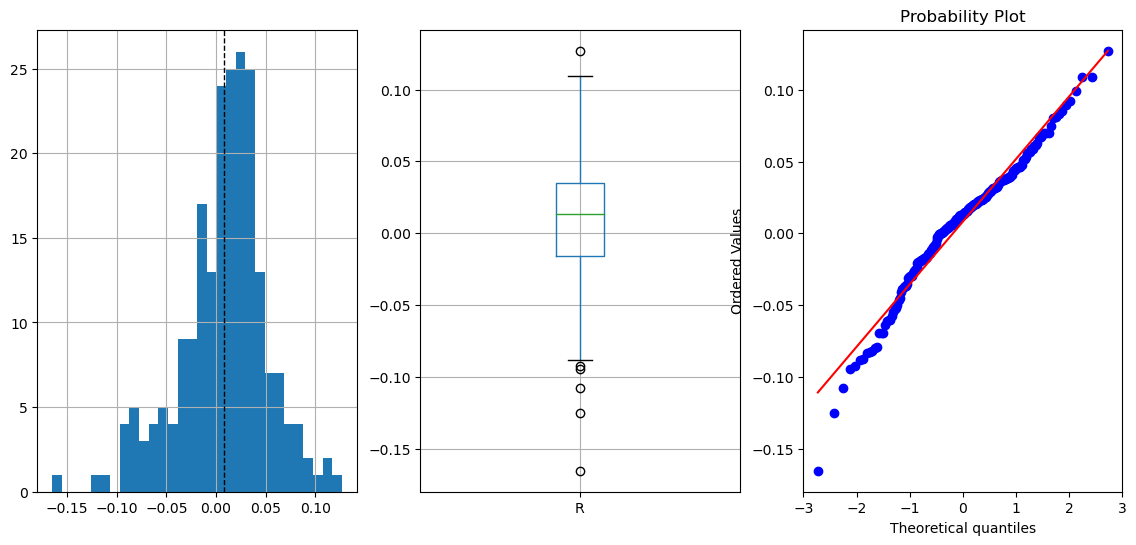

In [29]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3);

monthly_ret.R.hist(bins=30, ax=ax1);
ax1.axvline(monthly_ret.R.mean(), color='k', linestyle='dashed', linewidth=1);

monthly_ret.boxplot('R', ax=ax2);
stats.probplot(monthly_ret.R, dist="norm", plot=ax3);

# plt.tight_layout()
fig.set_size_inches(14, 6)

## Add titles to each subplot

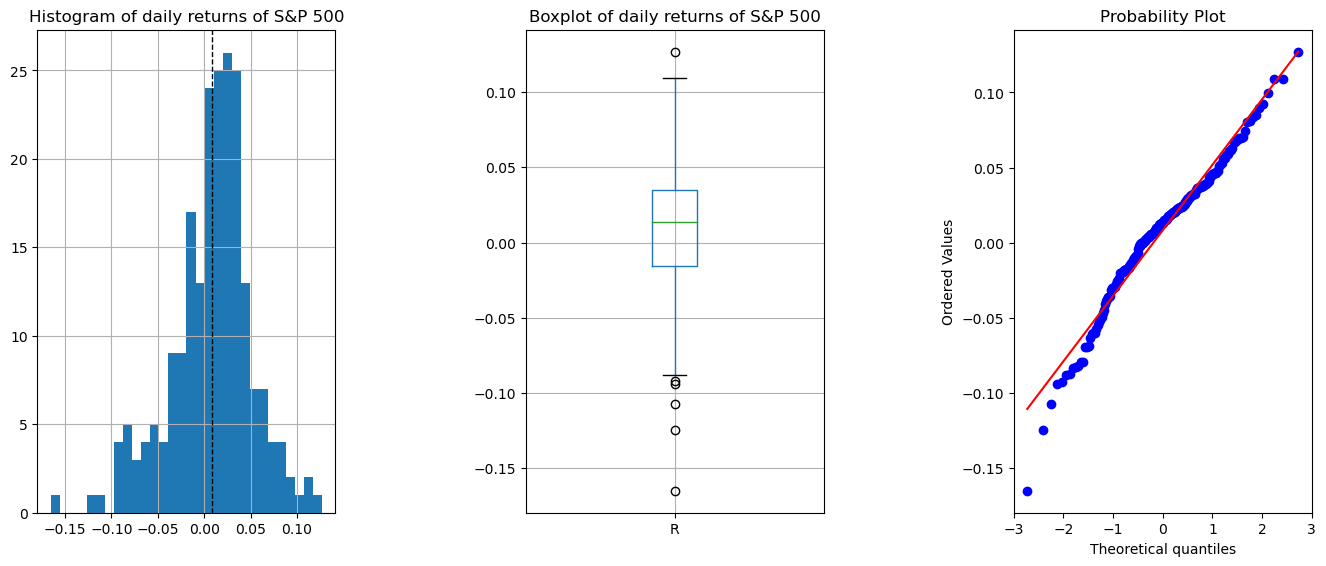

In [30]:
# Add the main title
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3);

monthly_ret.R.hist(bins=30, ax=ax1);
ax1.axvline(monthly_ret.R.mean(), color='k', linestyle='dashed', linewidth=1);
ax1.set_title("Histogram of daily returns of S&P 500")

monthly_ret.boxplot('R', ax=ax2);
ax2.set_title("Boxplot of daily returns of S&P 500")

stats.probplot(monthly_ret.R, dist="norm", plot=ax3);

plt.tight_layout()
fig.set_size_inches(14, 6)